In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [12]:
df = pd.read_csv("sitiosphunesco.csv")

# Sitios declarados Patrimonios de la Humanidad por la UNESCO

In [13]:
df.head(5)

,Cod_Loc,IdRegion,IdProvincia,IdDepartamento,Observaciones,Categoría,SubCategoria,Provincia,Departamento,Localidad,...,Teléfono,Mail,Web,Latitud,Longitud,TipoLatitudLongitud,Fuente,declaracion_año,descripcion,año_actualizacion
0,26007020,6,26,26007,Codigo en Puerto Madryn,Patrimonio de la Humanidad,NaN,Chubut,Biedma,Península Valdés,...,NaN,NaN,NaN,-42.442000,-62.638000,centroide localidad,UNESCO / SInCA,1999,Singular accidente geográfico que forma una i...,2020
1,14014010,2,14,14014,NaN,Patrimonio de la Humanidad,NaN,Córdoba,Capital,Córdoba,...,NaN,NaN,NaN,-31.418219,-64.187447,localización precisa,UNESCO / SInCA,2000,La Manzana Jesuítica comprende tres edificios ...,2020
2,14021050,2,14,14021,NaN,Patrimonio de la Humanidad,NaN,Córdoba,Colon,Colonia Caroya,...,426701,direcciondepatrimoniocultural@cba.gov.ar,NaN,-30.988106,-64.106194,localización precisa,UNESCO / SInCA,2000,Museo pluritematico y centro de interpretación...,2020
3,14021140,2,14,14021,NaN,Patrimonio de la Humanidad,NaN,Córdoba,Colon,Jesús María,...,420126,NaN,NaN,-30.969972,-64.097176,localización precisa,UNESCO / SInCA,2000,NaN,2020
4,14021020,2,14,14021,NaN,Patrimonio de la Humanidad,NaN,Córdoba,Colon,Ascochinga,...,NaN,NaN,NaN,-30.869760,-64.234052,localización precisa,UNESCO / SInCA,2000,NaN,2020


In [14]:
df.dtypes

Cod_Loc                  int64
IdRegion                 int64
IdProvincia              int64
IdDepartamento           int64
Observaciones           object
Categoría               object
SubCategoria           float64
Provincia               object
Departamento            object
Localidad               object
Nombre                  object
Dirección               object
Piso                   float64
CP                     float64
cod_area               float64
Teléfono                object
Mail                    object
Web                     object
Latitud                float64
Longitud               float64
TipoLatitudLongitud     object
Fuente                  object
declaracion_año          int64
descripcion             object
año_actualizacion        int64
dtype: object

In [15]:
df1 = df[["Nombre", "Cod_Loc", "Provincia", "Departamento", "Localidad", 
         "Latitud", "Longitud", "declaracion_año", "descripcion"]
        ]

In [16]:
df1.head(6)

,Nombre,Cod_Loc,Provincia,Departamento,Localidad,Latitud,Longitud,declaracion_año,descripcion
0,Península Valdés,26007020,Chubut,Biedma,Península Valdés,-42.442000,-62.638000,1999,Singular accidente geográfico que forma una i...
1,Manzana Jesuítica y Estancias de Córdoba,14014010,Córdoba,Capital,Córdoba,-31.418219,-64.187447,2000,La Manzana Jesuítica comprende tres edificios ...
2,Estancia Jesuítica de Caroya,14021050,Córdoba,Colon,Colonia Caroya,-30.988106,-64.106194,2000,Museo pluritematico y centro de interpretación...
3,Estancia Jesuítica Jesús María,14021140,Córdoba,Colon,Jesús María,-30.969972,-64.097176,2000,NaN
4,Manzana Jesuítica y Estancias de Córdoba,14021020,Córdoba,Colon,Ascochinga,-30.869760,-64.234052,2000,NaN
5,Manzana Jesuítica y Estancias de Córdoba,14028050,Córdoba,Cruz del Eje,Cruz del Eje,-30.724319,-64.807705,2000,Ubicado en un paraje natural de la pampa de Sa...


In [17]:
df1_rename = df1.rename(columns=str.lower)

In [18]:
df1_rename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           24 non-null     object 
 1   cod_loc          24 non-null     int64  
 2   provincia        24 non-null     object 
 3   departamento     24 non-null     object 
 4   localidad        24 non-null     object 
 5   latitud          24 non-null     float64
 6   longitud         24 non-null     float64
 7   declaracion_año  24 non-null     int64  
 8   descripcion      17 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ KB


**Podemos ver que cuenta con 24 filas y 9 columnas (2da y 3ra línea).    
Con la columna "Non-Null Count" podemos saber cuántos valores nulos hay en cada columna. Ej. En la columna "descripción" hay 7 valores nulos (24 - 17).  
La última columna nos dice de qué tipo son los valores de las columnas.**

### Preguntas sobre el dataset:
1. ¿En qué provincias se encuentan los sitios? ¿Qué provincias tienen más sitios?
2. ¿En qué localidades de la provincia con más sitios se encuentran los sitios?
3. ¿En qué años se declararon como patrimonio de la humanidad? ¿Cuáles se declaron primeros y cuáles últimos? 

## 1. ¿En qué provincias se encuentan los sitios? ¿Qué provincias tienen más sitios?
Primero ordenaremos nuestro dataset.  
- Agrupamos los sitios por provincia, obteniendo cantidad de sitios en cada provincia.  
- Ordenamos por mayor a menor cantidad

In [19]:
df_provincia = df1_rename.groupby("provincia")["nombre"].count().sort_values(ascending=False)

In [20]:
df_provincia.head(10)

provincia
Córdoba         6
Misiones        6
Salta           4
Chubut          2
Santa Cruz      2
Buenos Aires    1
Jujuy           1
La Rioja        1
San Juan        1
Name: nombre, dtype: int64

<AxesSubplot:ylabel='nombre'>

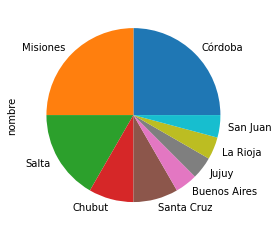

In [21]:
df_provincia.plot(kind="pie", colormap="tab10")      # https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html

**Podemos observar que las provincias con más sitios declarados patrimonio de la humanidad son: Córdoba(6), Misiones(6) y Salta(4). El resto tiene menos de 3 sitios.**

## 2. ¿En qué localidades de Misiones y Córdoba se encuentran los sitios?
Primeros prepararemos el dataset  
- De la columna "provincia" usaremos los datos de Misiones únicamente.  
- Utilizaremos la columna "localidad" para saber cuáles son las localidades y si se repiten

In [22]:
df1_rename.loc[df1_rename["provincia"] == "Misiones", ["localidad", "nombre"]]

,localidad,nombre
9,Candelaria,Misiones Jesuíticas de Los Guaraníes
10,Loreto,Misiones Jesuíticas de Los Guaraníes
11,Santa Ana,Misiones Jesuíticas de Los Guaraníes
12,Puerto Iguazú,Parque Nacional Iguazú
13,San Ignacio,Misiones Jesuíticas de Los Guaraníes
14,Itacaruare,Misiones Jesuíticas de Los Guaraníes


In [23]:
df1_rename.loc[df1_rename["provincia"] == "Córdoba", ["localidad", "nombre"]]

,localidad,nombre
1,Córdoba,Manzana Jesuítica y Estancias de Córdoba
2,Colonia Caroya,Estancia Jesuítica de Caroya
3,Jesús María,Estancia Jesuítica Jesús María
4,Ascochinga,Manzana Jesuítica y Estancias de Córdoba
5,Cruz del Eje,Manzana Jesuítica y Estancias de Córdoba
6,Alta Gracia,Manzana Jesuítica y Estancias de Córdoba


<span style="font-size:15px"><span style="color:brown">
Podemos observar que solo existe 1 sitio por localidad, tanto en Córdoba como en Misiones y que la mayoría de los sitios tienen que ver con las misiones jesuíticas.</span></span>

## 3. ¿En qué años se declararon como patrimonio de la humanidad? ¿Cuáles se declaron primero y cuáles en último lugar?
- Primero veremos la cantidad de sitios declarados según el año.  
- Luego cuáles son los más recientemente declarados y también los que se declararon primero.

In [24]:
df1_rename.groupby("declaracion_año")["nombre"].count()

declaracion_año
1981    1
1984    4
1985    2
1999    2
2000    9
2014    4
2016    1
2017    1
Name: nombre, dtype: int64

In [25]:
df_anio = df1_rename.groupby("declaracion_año")["nombre"].count().sort_values(ascending=False) #Guardamos en variable 
                                                                                               # y ordenamos

<AxesSubplot:ylabel='nombre'>

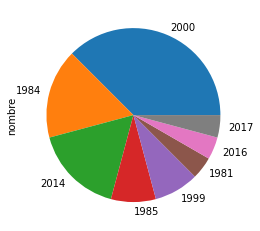

In [26]:
df_anio.plot(kind="pie")

**Podemos ver que las declaraciones se realizaron entre 1981 y el 2017. Pero los años en que más declaraciones se hicieron fueron en el 2000, 1984 y 2014.**

In [27]:
df1_rename.loc[
    (df1_rename["declaracion_año"] == 1981) | (df1_rename["declaracion_año"] == 2017),
    ["nombre", "declaracion_año", "provincia"]
]

,nombre,declaracion_año,provincia
21,Los Glaciares. Parque Nacional Los Glaciaries,1981,Santa Cruz
23,Parque Nacional Los Alerces,2017,Chubut


**Podemos ver que el primer sitio declarado es el Parque Nacional Los Glaciares de la provincia de Santa Cruz, en 1981.  
El último declarado es el Parque Nacional Los Alerces de Chubut, en 2017.**

# Mapas

In [92]:
df1_rename[["latitud", "longitud"]].describe()

,latitud,longitud
count,24.000000,24.000000
mean,-31.243139,-63.374994
std,7.320253,5.576486
min,-50.339205,-72.261967
25%,-31.477302,-66.528392
50%,-30.244428,-64.332328
75%,-26.845813,-57.392126
max,-23.205505,-54.576727


In [100]:
fig = go.Figure()

In [102]:
for i in df1_rename:
    fig.add_trace(go.Scattergeo(
            lon = df1_rename['longitud'],
            lat = df1_rename['latitud'],
            text = df1_rename['nombre'],
    )       )

In [103]:
fig.update_layout(
    title_text = 'Sitios declarados Patrimonio de la Humanidad - Argentina actualizado 2020',
    height=800,
    geo = dict(
        scope='south america',
        lataxis_range=[-57,-20], lonaxis_range=[-75, -50],
        visible=True,
        showcountries=True, countrycolor="RebeccaPurple",
        showsubunits=True, subunitcolor="Blue",
    )
)